In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [29]:
ticker = 'DAX'
data = yf.download(ticker)

[*********************100%***********************]  1 of 1 completed


In [30]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,DAX,DAX,DAX,DAX,DAX
Date,,,,,
2014-10-23,19.979094,19.994919,19.852493,19.852493,7400
2014-10-24,19.931620,19.931620,19.892056,19.892056,15200
2014-10-27,19.803436,19.803436,19.803436,19.803436,300
2014-10-28,20.184818,20.184818,20.129431,20.129431,3800
2014-10-29,20.311424,20.311424,20.303512,20.303512,13600


In [31]:
columns = ['Close', 'High', 'Low', 'Open','Volume']
data.columns = columns
data

,Close,High,Low,Open,Volume
Date,,,,,
2014-10-23,19.979094,19.994919,19.852493,19.852493,7400
2014-10-24,19.931620,19.931620,19.892056,19.892056,15200
2014-10-27,19.803436,19.803436,19.803436,19.803436,300
2014-10-28,20.184818,20.184818,20.129431,20.129431,3800
2014-10-29,20.311424,20.311424,20.303512,20.303512,13600
...,...,...,...,...,...
2025-03-05,40.720001,40.770000,40.063999,40.099998,573600
2025-03-06,40.639999,41.320000,40.570000,40.779999,783300
2025-03-07,40.889999,40.917999,40.320000,40.430000,373000


In [32]:
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
data.dropna(inplace=True)

In [33]:
X = data[['Close', 'MA_10', 'MA_50']]
y = data['Close'].shift(-1).dropna()
X = X[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.9946298533651917


Text(0, 0.5, 'Predicted Price')

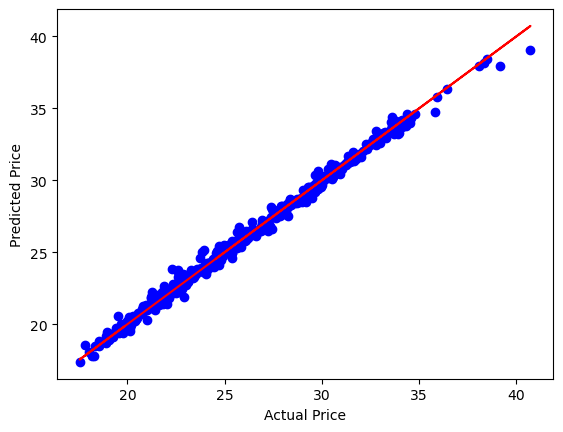

In [35]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [36]:
init_balance = 10000
balance = init_balance
position = 0

for i in range (len(X_test)):
    current = X_test.iloc[i]["Close"]
    prediction = y_pred[i]
    if prediction > current and current < balance:
        shares = balance//current
        if shares>0:
            balance = balance - shares*current
            position = position + shares
            print(f"Buying {shares} shares at {current}")
    elif prediction < current and position>0:
        balance = balance + position*current
        print(f"Selling {position} shares at {current}")
        position = 0
final = balance + (position*X_test.iloc[-1]["Close"])
print(f"Profit: {final-init_balance}")

Buying 412.0 shares at 24.219621658325195
Selling 412.0 shares at 33.81840515136719
Buying 513.0 shares at 27.1613826751709
Buying 1.0 shares at 20.12896728515625
Selling 514.0 shares at 29.3407039642334
Buying 613.0 shares at 24.590003967285156
Selling 613.0 shares at 33.220001220703125
Buying 755.0 shares at 26.95186424255371
Selling 755.0 shares at 26.634363174438477
Buying 790.0 shares at 25.46428680419922
Selling 790.0 shares at 35.81999969482422
Buying 1008.0 shares at 28.064189910888672
Buying 1.0 shares at 22.415815353393555
Selling 1009.0 shares at 33.776519775390625
Buying 1348.0 shares at 25.265579223632812
Buying 1.0 shares at 21.817310333251953
Selling 1349.0 shares at 34.18740463256836
Buying 1990.0 shares at 23.176734924316406
Selling 1990.0 shares at 30.13969612121582
Buying 3085.0 shares at 19.440797805786133
Selling 3085.0 shares at 33.758567810058594
Buying 5162.0 shares at 20.172161102294922
Buying 1.0 shares at 17.337528228759766
Selling 5163.0 shares at 28.7232589